In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [68]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()


In [78]:
test['date'] = pd.to_datetime(test['date'])

In [79]:
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test['day'] = test['date'].dt.day

In [50]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year,month_name
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,January
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,January
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,January
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,January
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,January


In [69]:
df['day'] = df['date'].dt.day
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure,month,year,month_name,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,January,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,January,2
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,January,3
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,January,4
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,January,5
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,1,2013,January,6
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,1,2013,January,7
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286,1,2013,January,8
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000,1,2013,January,9
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667,1,2013,January,10


In [77]:
test = pd.read_csv('DailyDelhiClimateTest.csv')

<Axes: >

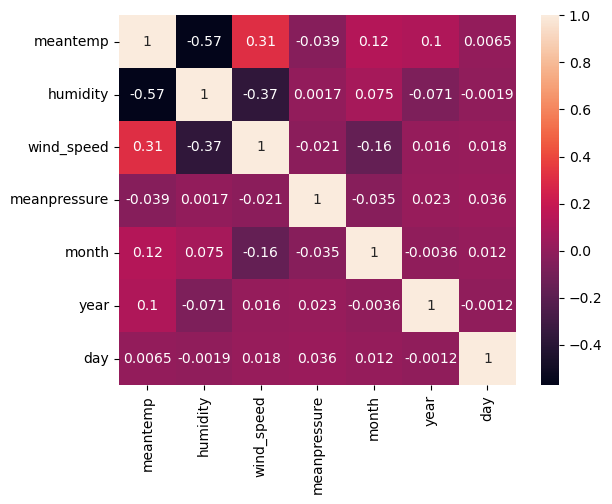

In [60]:
sns.heatmap(df.drop(columns=['date','month_name']).corr() , annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
#test = pd.read_csv('DailyDelhiClimateTest.csv')
Xtrain = df.drop(columns=['meantemp','month_name','date'])
Ytrain = df[['meantemp']]




In [80]:
Xtest = test.drop(columns=['meantemp','date'])
Ytest = test[['meantemp']]

In [81]:
print(Xtrain.head(),'\n',Ytrain.head(),'\n',Xtest.head(),'\n',Ytest.head())

    humidity  wind_speed  meanpressure  month  year  day
0  84.500000    0.000000   1015.666667      1  2013    1
1  92.000000    2.980000   1017.800000      1  2013    2
2  87.000000    4.633333   1018.666667      1  2013    3
3  71.333333    1.233333   1017.166667      1  2013    4
4  86.833333    3.700000   1016.500000      1  2013    5 
     meantemp
0  10.000000
1   7.400000
2   7.166667
3   8.666667
4   6.000000 
     humidity  wind_speed  meanpressure  month  year  day
0  85.869565    2.743478     59.000000      1  2017    1
1  77.222222    2.894444   1018.277778      1  2017    2
2  81.888889    4.016667   1018.333333      1  2017    3
3  70.050000    4.545000   1015.700000      1  2017    4
4  74.944444    3.300000   1014.333333      1  2017    5 
     meantemp
0  15.913043
1  18.500000
2  17.111111
3  18.700000
4  18.388889


In [84]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
from sklearn.metrics import r2_score
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()


models = [linear , lasso , ridge , DT , RF]
ypred = []


for model in models:
    model = model.fit(Xtrain,Ytrain)
    ypred = model.predict(Xtest)
    print('r2 score is : ',r2_score(Ytest,ypred))


r2 score is :  0.18725658133679823
r2 score is :  0.3491842155701288
r2 score is :  0.18737096367478745
r2 score is :  0.6226610322211936


d:\Anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


r2 score is :  0.7222486205802915


### finding Monthly avg of temp

In [15]:
monthly_avg = df.groupby(['year','month'])['meantemp'].mean()

In [16]:
monthly_avg

year  month
2013  1        12.074770
      2        16.867560
      3        22.814209
      4        28.895119
      5        33.776767
      6        32.480873
      7        30.663594
      8        29.547773
      9        29.840595
      10       26.129186
      11       18.811706
      12       15.179339
2014  1        13.431836
      2        15.746811
      3        21.593318
      4        28.058333
      5        31.405530
      6        34.770833
      7        32.034163
      8        31.411968
      9        29.762500
      10       26.496544
      11       20.104167
      12       14.823733
2015  1        12.708525
      2        18.791454
      3        21.547811
      4        28.002976
      5        33.352535
      6        32.737500
      7        30.409562
      8        30.330789
      9        30.650000
      10       26.865207
      11       20.754167
      12       14.989631
2016  1        15.139363
      2        19.025676
      3        25.701075
      4      

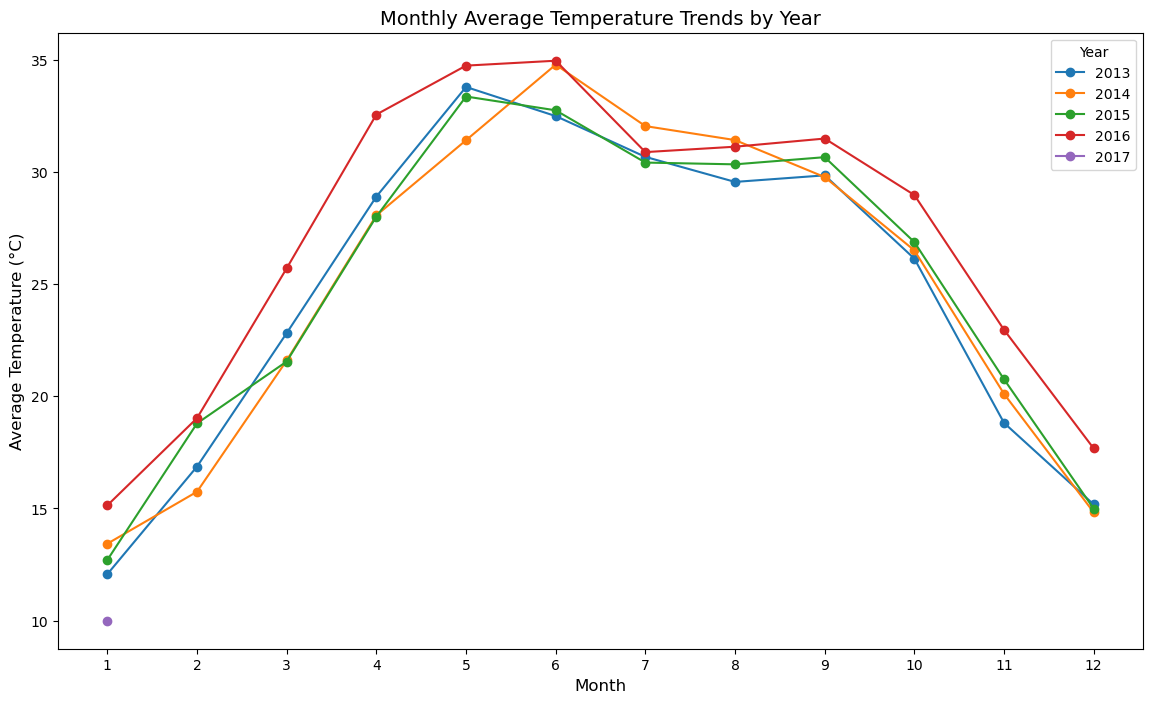

In [26]:

monthly_avg_unstacked = monthly_avg.unstack(level=0)

plt.figure(figsize=(14, 8))
for year in monthly_avg_unstacked.columns:
    plt.plot(monthly_avg_unstacked.index, monthly_avg_unstacked[year],marker='o', label=year)

plt.title('Monthly Average Temperature Trends by Year', fontsize=14)
plt.xlabel('Month', fontsize=12 )
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='Year')
plt.xticks(range(1,13))
plt.show()

In [20]:
monthly_avg_unstacked

year,2013,2014,2015,2016,2017
month,,,,,
1,12.074770,13.431836,12.708525,15.139363,10.0
2,16.867560,15.746811,18.791454,19.025676,NaN
3,22.814209,21.593318,21.547811,25.701075,NaN
4,28.895119,28.058333,28.002976,32.550029,NaN
5,33.776767,31.405530,33.352535,34.728726,NaN
6,32.480873,34.770833,32.737500,34.946836,NaN
7,30.663594,32.034163,30.409562,30.875806,NaN
8,29.547773,31.411968,30.330789,31.116578,NaN
9,29.840595,29.762500,30.650000,31.479768,NaN


In [27]:
wind_avg = df.groupby(['year','month'])['wind_speed'].max()
wind_avg

year  month
2013  1        13.228571
      2        17.587500
      3        24.066667
      4        15.560000
      5        17.587500
      6        16.350000
      7        13.537500
      8        18.525000
      9        42.220000
      10        7.420000
      11       19.912500
      12       34.487500
2014  1        27.337500
      2        15.050000
      3        15.600000
      4        15.512500
      5        19.450000
      6        24.325000
      7        18.050000
      8        20.825000
      9        30.685714
      10       25.012500
      11        7.412500
      12       11.371429
2015  1        27.775000
      2        14.812500
      3        14.812500
      4        17.600000
      5        17.125000
      6        18.750000
      7        19.912500
      8        33.325000
      9        15.275000
      10       18.785714
      11        5.787500
      12       10.887500
2016  1        11.240000
      2        17.137500
      3        22.100000
      4      

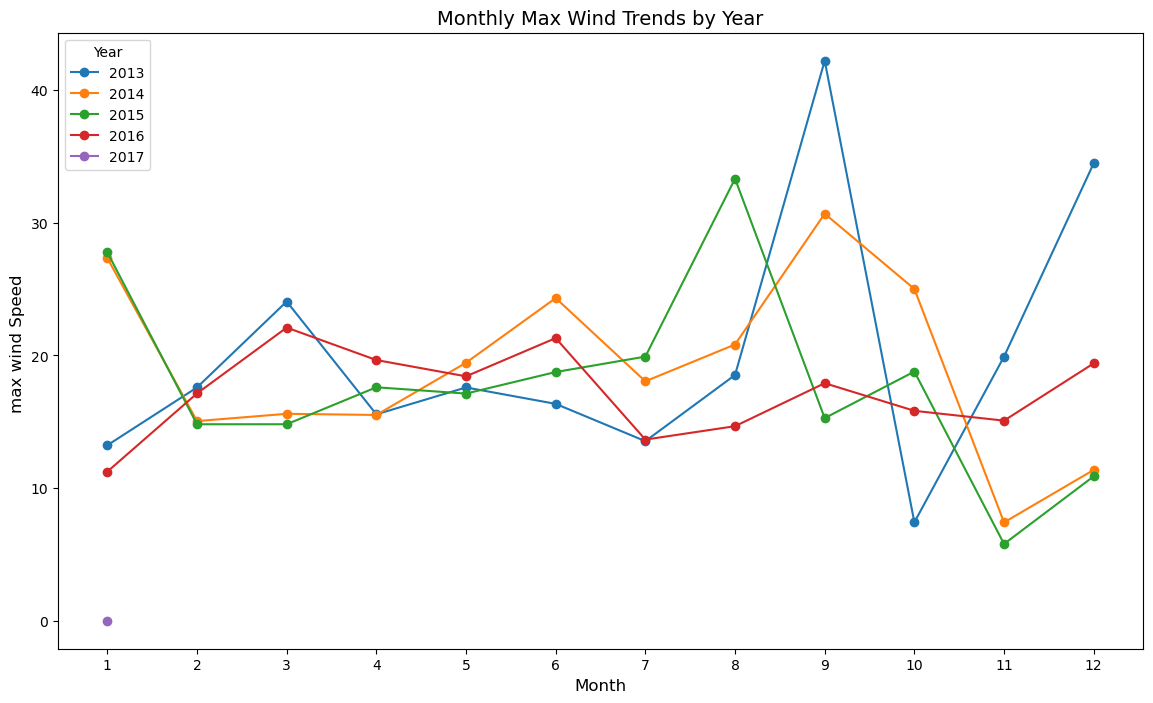

In [28]:
wind_avg_unstacked = wind_avg.unstack(level=0)

plt.figure(figsize=(14, 8))
for year in wind_avg_unstacked.columns:
    plt.plot(wind_avg_unstacked.index, wind_avg_unstacked[year],marker='o', label=year)

plt.title('Monthly Max Wind Trends by Year', fontsize=14)
plt.xlabel('Month', fontsize=12 )
plt.ylabel('max wind Speed ', fontsize=12)
plt.legend(title='Year')
plt.xticks(range(1,13))
plt.show()

## Building ML model to predict next 5 months avg temperature
using Time Series Analysis